In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

%matplotlib inline
    
img = cv2.imread('/home/amenegotto/dataset/2d/com_pre_proc/train/nok/TCGA-VQ-A94R_ff1bbd61f1254185a752217d5799ce13.png',0)
rows,cols = img.shape

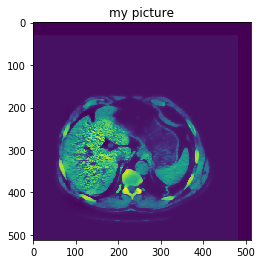

In [10]:
# width and height shift
M = np.float32([[1,0,-30],[0,1,30]])

dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('my picture')
plt.show()

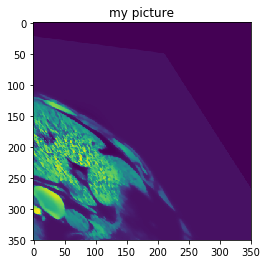

In [20]:
# affine transform (skimage)

from skimage.transform import warp, AffineTransform

tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(img, tform.inverse, output_shape=(350, 350))
plt.imshow(image)
plt.title('my picture')
plt.show()

In [40]:
import random
print(random.uniform(-0.20, 0.20))

0.07196071182831598


0.011126892098838681


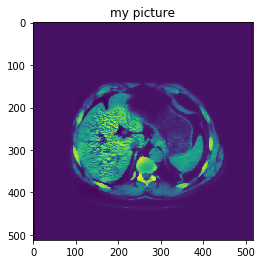

In [53]:
# shear opencv

shear_factor = random.uniform(0, 0.3)

print(shear_factor)
w,h = img.shape[1], img.shape[0]    

M = np.array([[1, abs(shear_factor), 0],[0,1,0]])

nW =  img.shape[1] + abs(shear_factor*img.shape[0])

dst = cv2.warpAffine(img, M, (int(nW), img.shape[0]))

plt.imshow(dst)
plt.title('my picture')
plt.show()

(512, 512)
(512, 512, 1)


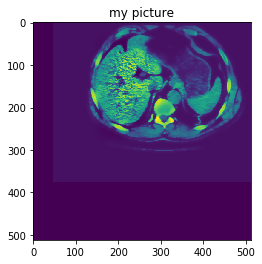

In [69]:
from keras.preprocessing.image import random_shift

img_3d = img[..., np.newaxis]

print(img.shape)
print(img_3d.shape)
shifted = random_shift(img_3d, wrg=0.3, hrg=0.3, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0)

shifted.shape
plt.imshow(np.squeeze(shifted))
plt.title('my picture')
plt.show()

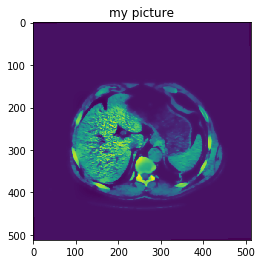

In [78]:
from keras.preprocessing.image import random_rotation

# max 20 degrees
rotated = random_rotation(img_3d, 20, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0)
plt.imshow(np.squeeze(rotated))
plt.title('my picture')
plt.show()

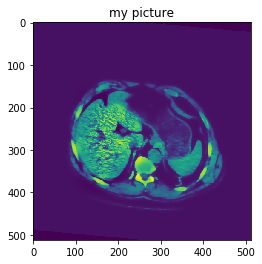

In [91]:
from keras.preprocessing.image import random_shear

# max 15
sheared = random_shear(img_3d, intensity=15,row_axis=0,col_axis=1, channel_axis=2,fill_mode='constant', cval=0)

plt.imshow(np.squeeze(sheared))
plt.title('my picture')
plt.show()

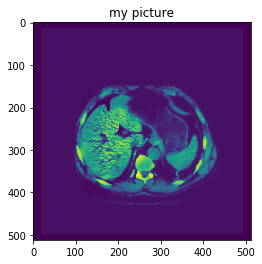

In [95]:
from keras.preprocessing.image import random_zoom

# between 0.7 and 1.3
zoomed = random_zoom(img_3d, zoom_range=(0.7,1.3), row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant',cval=0)

plt.imshow(np.squeeze(zoomed))
plt.title('my picture')
plt.show()